In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm



In [11]:
%config IPCompleter.greedy=True

In [12]:
!pip install statsmodels
!pip install jedi
!pip install ipython


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
train_set_x=torch.load("train_x.pt").to(device)
train_set_y=torch.load("train_y.pt").to(device)
train_set_z=torch.load("test_z.pt").to(device)
# train_set_z.cuda()

In [8]:
def return_numpy_from_tensor(tensor1, tensor2, tensor3):
    return tensor1.cpu().detach().numpy(), tensor2.cpu().detach().numpy(), tensor3.cpu().detach().numpy()

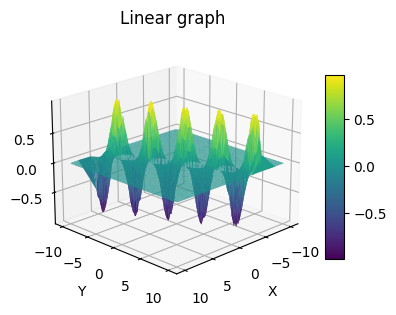

In [9]:
def draw_ds_plot():
    Xnm, Ynm, Znm  = return_numpy_from_tensor(train_set_x,train_set_y,train_set_z)
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=20, azim=45)
    surf = ax.plot_trisurf(Xnm, Ynm, Znm, cmap='viridis', label='Prediction')
    fig.colorbar(surf, shrink=0.5, aspect=10)
    plt.title("Linear graph")
    plt.show()
draw_ds_plot()

Проведем анализ, какое количество точек имеет около 0 координату

In [11]:
znull= train_set_z.cpu().detach().n
find_nullz = np.where((znull >= -0.01) & (znull<=0.01))
print(len(find_nullz[0]))

18019


Много избавимся от их большинства

Создаем модель

In [7]:
class myFuncNet(torch.nn.Module):
    def __init__(self):
        super(myFuncNet, self).__init__()
        self.fc1 = torch.nn.Linear(2, 2048)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(2048, 1)

    def forward(self, xy):
        xy = self.fc1(xy)
        xy = self.act1(xy)
        xy = self.fc2(xy)
        return xy

myFunc = myFuncNet().to(device)

Предсказаниие

16708


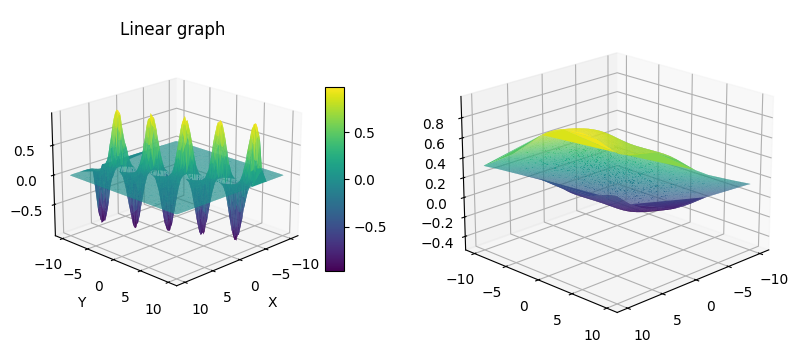

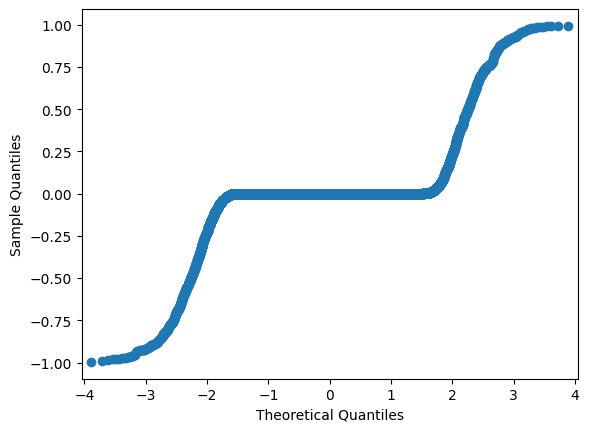

In [6]:
def predict(neron, x, y, z):
    z_pred = myFunc.forward(torch.stack([x, y], dim=1).to(torch.float)).squeeze(1)

    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    X1nm, Y1nm, Z1nm  = return_numpy_from_tensor(x,y,z_pred)

    bx = fig.add_subplot(1, 2, 2, projection='3d')
    bx.view_init(elev=20, azim=45)
    bx.plot_trisurf(X1nm, Y1nm, Z1nm, cmap='viridis', label='Prediction')

    # Строим распределение
    sm.qqplot(Znm)

    zzz= train_set_z.cpu().detach().numpy()
    indices_z = np.where((zzz >= -0.00001)&(zzz<=0.00001))[0]
    print(len(indices_z))


    plt.show()

predict(myFunc, train_set_x, train_set_y, train_set_z)

In [ ]:
optimizer = torch.optim.Adam(myFunc.parameters(), lr=0.01)

In [ ]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

In [ ]:
for epoch_index in range(50):
    print(epoch_index)

    
    optimizer.zero_grad()

    z_pred = myFunc.forward(torch.stack([train_set_x, train_set_x], dim=1).to(torch.float))
    loss_val = loss(z_pred, train_set_z)

    loss_val.backward()

    optimizer.step()

predict(myFunc, train_set_x, train_set_y, train_set_z)